# 1. Find out how many males and females participated in the test.

In [1]:
import pandas as pd
studentPerformance = pd.read_csv("StudentsPerformance.csv")
studentPerformance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [2]:
studentGender = studentPerformance.groupby(['gender'])['gender'].count()

In [3]:
studentGender

gender
female    518
male      482
Name: gender, dtype: int64

So there were 518 females and 482 male students

# 2. The students' parental level of education

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Parental level of education'}, xlabel='parental level of education', ylabel='Number of parents'>

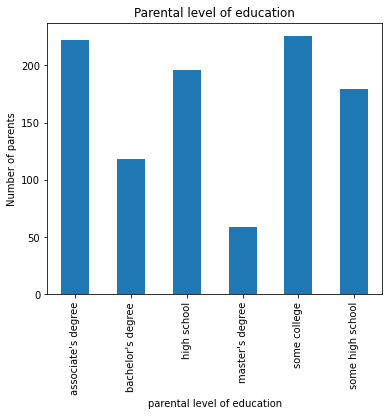

In [7]:

studParentLevel = studentPerformance.groupby(['parental level of education'])['parental level of education'].count()
studParentLevel.plot(kind='bar', title='Parental level of education', ylabel='Number of parents',
         xlabel='parental level of education', figsize=(6, 5))

In [10]:
studentPerformance['parental level of education'].value_counts().to_frame()

,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


So its visble that most parents are some college or associates degree level and less of the parents are master degree


# 3. (a) STUDENTS SCORED ABOVE AVERAGE FOR MATH ,READING,WRITING BASED ON GENDER

In [11]:
studentAverage = studentPerformance[['gender', 'math score', 'reading score', 'writing score']].groupby('gender').mean()
studentAverage

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [12]:
import statistics 
avg_m=statistics.mean(studentPerformance['math score'])
avg_r=statistics.mean(studentPerformance['reading score'])
avg_w=statistics.mean(studentPerformance['writing score'])
studentPerformanceOverall={"Maths score": [avg_m], 'Reading score':[avg_r],'Writing score':[avg_w]}
studentPerformanceOverall=pd.DataFrame(studentPerformanceOverall)
studentPerformanceOverall



,Maths score,Reading score,Writing score
0,66.001,69.195,68.119


Overall mean for each score

In [13]:
#Average of male

male=studentPerformance['gender']=='male'
female=studentPerformance['gender']=='female'
avg_M=studentPerformance[male]
avg_M

avg_m=statistics.mean(avg_M['math score'])
avg_r=statistics.mean(avg_M['reading score'])
avg_w=statistics.mean(avg_M['writing score'])
studentPerformanceMale={"Maths score": [avg_m], 'Reading score':[avg_r],'Writing score':[avg_w]}
studentPerformanceMale=pd.DataFrame(studentPerformanceMale)
studentPerformanceMale



,Maths score,Reading score,Writing score
0,68.821577,65.545643,63.446058


In [14]:
#Average of Female
avg_FM=studentPerformance[female]
avg_FM

avg_f=statistics.mean(avg_FM['math score'])
avg_fr=statistics.mean(avg_FM['reading score'])
avg_fw=statistics.mean(avg_FM['writing score'])
studentPerformanceFemale={"Maths score": [avg_f], 'Reading score':[avg_fr],'Writing score':[avg_fw]}
studentPerformanceFemale=pd.DataFrame(studentPerformanceFemale)
studentPerformanceFemale

,Maths score,Reading score,Writing score
0,63.376448,72.590734,72.467181


# 3. (b) STUDENTS SCORED ABOVE AVERAGE FOR MATH ,READING,WRITING BASED ON Test preparation course

In [15]:
TestCourse= studentPerformance[['test preparation course', 'math score', 'reading score', 'writing score']].groupby('test preparation course').mean()
TestCourse

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# 4. (a) Scoring variation for math, reading and writing based on Gender

In [16]:
studentPerformanceVariation= studentPerformance[['gender', 'math score', 'reading score', 'writing score']].groupby('gender').var()
studentPerformanceVariation

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


Male students have less variations for each of the scores.

# 4. (b) Scoring variation for math, reading and writing based on test preparation course

In [17]:
studentPerformanceVariationOnTest= studentPerformance[['test preparation course', 'math score', 'reading score', 'writing score']].groupby('test preparation course').std()
studentPerformanceVariationOnTest

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


# 5. Top 25% of students based on their maths score

In [19]:
topStudents = studentPerformance.sort_values('math score', ascending=False).nlargest(250,"math score")
topStudents

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
